Basic Statistics:
           voltage      current        power         hour  day_of_week  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    221.300703    15.191018  3002.917107    11.220000     2.768000   
std      16.985626     2.983696   491.727141     6.946932     2.188828   
min     187.587327     6.178834  1490.243922     0.000000     0.000000   
25%     213.604151    13.175266  2676.000193     5.000000     1.000000   
50%     220.325098    15.162894  2999.874618    11.000000     2.000000   
75%     226.594409    17.159431  3330.457657    17.000000     5.000000   
max     400.000000    24.579323  4963.118853    23.000000     6.000000   

       is_outlier  
count   1000.0000  
mean       0.8000  
std        0.6003  
min       -1.0000  
25%        1.0000  
50%        1.0000  
75%        1.0000  
max        1.0000  


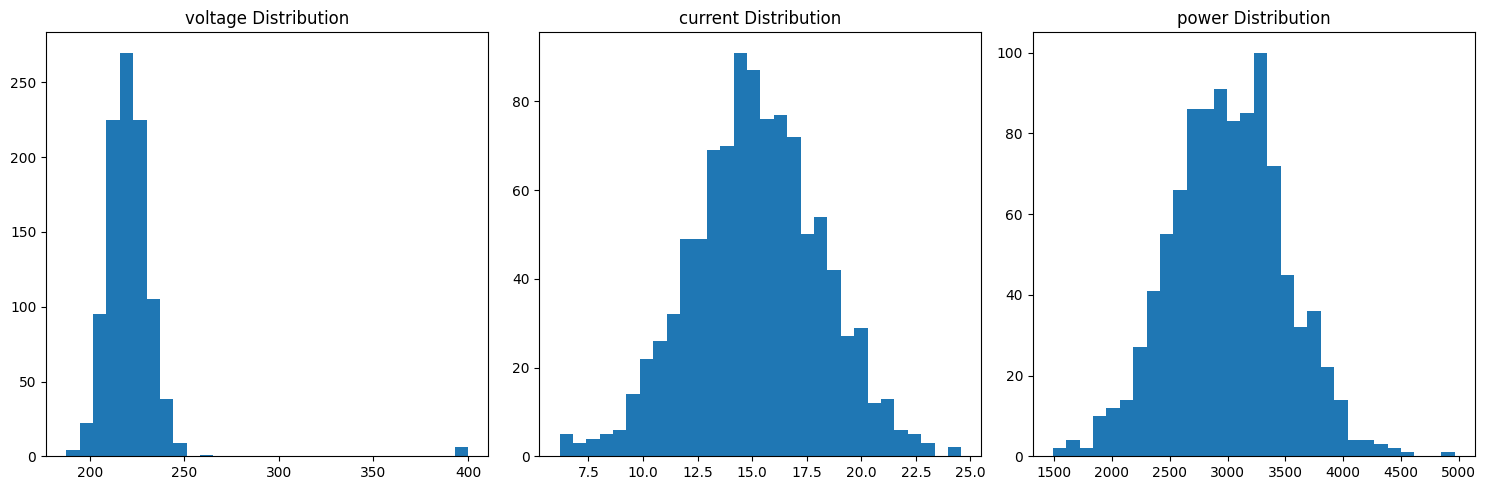


Remaining missing values: 0


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned data
clean_data = pd.read_csv("../data/processed/cleaned_data.csv")

# 1. Check basic stats
print("Basic Statistics:")
print(clean_data.describe())

# 2. Plot distributions
plt.figure(figsize=(15, 5))
for i, col in enumerate(['voltage', 'current', 'power']):
    plt.subplot(1, 3, i+1)
    plt.hist(clean_data[col], bins=30)
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.savefig("../plots/cleaned_distributions.png")
plt.show()

# 3. Check remaining missing values
print("\nRemaining missing values:", clean_data.isna().sum().sum())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 544
[LightGBM] [Info] Number of data points in the train set: 1000, number of used features: 5
[LightGBM] [Info] Start training from score 3002.917105


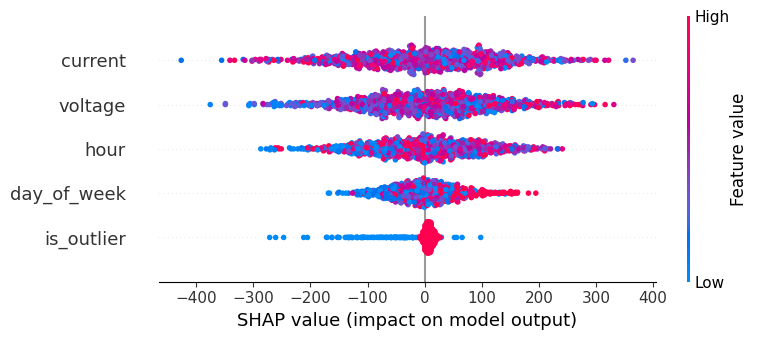

In [8]:
import lightgbm as lgb
import shap
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned data
clean_data = pd.read_csv("../data/processed/cleaned_data.csv")

# Train model
model = lgb.LGBMRegressor()
model.fit(clean_data.drop(columns=['power']), clean_data['power'])

# SHAP analysis
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(clean_data.drop(columns=['power']))

shap.summary_plot(shap_values, clean_data.drop(columns=['power']))